## 3 - Displaying Histograms and Crossplots

Created by: Andy McDonald

The following tutorial illustrates how to display well data from a LAS file on histograms and crossplots.

### Loading Well Data from CSV

The following cells load data in from a CSV file and replace the null values (-999.25) with Not a Number (NaN) values. More detail can be found in 1. Loading and Displaying Well Data From CSV.

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
root = '/users/kai/desktop/data_science/data/dongara'

In [4]:
well_name = 'dongara_20'

In [5]:
file_format = '.csv'

In [6]:
well = pd.read_csv(os.path.join(root,well_name+file_format), header=0)

In [7]:
well.replace(-999.25, np.nan, inplace=True)

In [9]:
cols = well.columns[well.dtypes.eq('object')]

In [10]:
well[cols] = well[cols].apply(pd.to_numeric, errors='coerce')

In [11]:
well.head(10)

,DEPT,CALI,DRHO,DT,GR,IND,MLL,NPHI,RHOB,SN,SP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.4572,NaN,NaN,NaN,13.7792,NaN,NaN,NaN,NaN,NaN,NaN
2,0.6096,NaN,NaN,NaN,14.6715,NaN,NaN,NaN,NaN,NaN,NaN
3,0.7620,NaN,NaN,NaN,15.2481,NaN,NaN,NaN,NaN,NaN,NaN
4,0.9144,NaN,NaN,NaN,14.8619,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0668,NaN,NaN,NaN,13.6161,NaN,NaN,NaN,NaN,NaN,NaN
6,1.2192,NaN,NaN,NaN,11.8116,NaN,NaN,NaN,NaN,NaN,NaN
7,1.3716,NaN,NaN,NaN,10.2286,NaN,NaN,NaN,NaN,NaN,NaN
8,1.5240,NaN,NaN,NaN,8.9049,NaN,NaN,NaN,NaN,NaN,NaN
9,1.6764,NaN,NaN,NaN,7.8831,NaN,NaN,NaN,NaN,NaN,NaN


### Displaying data on a histogram

Displaying a simple histogram can be done by calling the .hist function on the well dataframe and specifying the column.

array([[<AxesSubplot:title={'center':'GR'}>]], dtype=object)

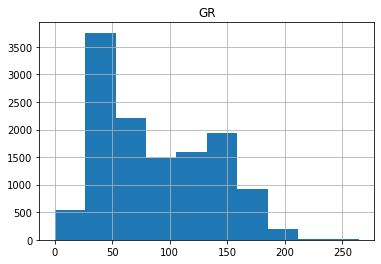

In [12]:
well.hist(column="GR")

The number of bins can be controled by the bins parameter:

array([[<AxesSubplot:title={'center':'GR'}>]], dtype=object)

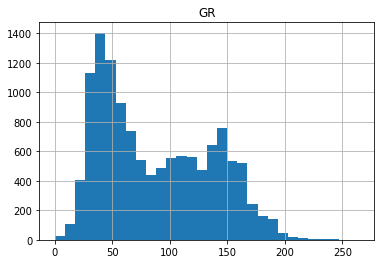

In [13]:
well.hist(column="GR", bins = 30)

We can also change the opacity of the bars by using the alpha parameter:

array([[<AxesSubplot:title={'center':'GR'}>]], dtype=object)

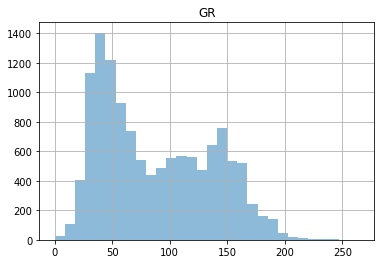

In [14]:
well.hist(column="GR", bins = 30, alpha = 0.5)

#### Plotting multiple histograms on one plot

It can be more efficient to loop over the columns (curves) within the dataframe and create a plot with multiple histograms, rather than duplicating the previous line multiple times. <br><br>

First we need to create a list of our curve names.

In [15]:
cols_to_plot = list(well)

We can remove the depth curve from our list and focus on our curves. The same line can be applied to other curves that need removing.

In [17]:
cols_to_plot.remove("DEPT")

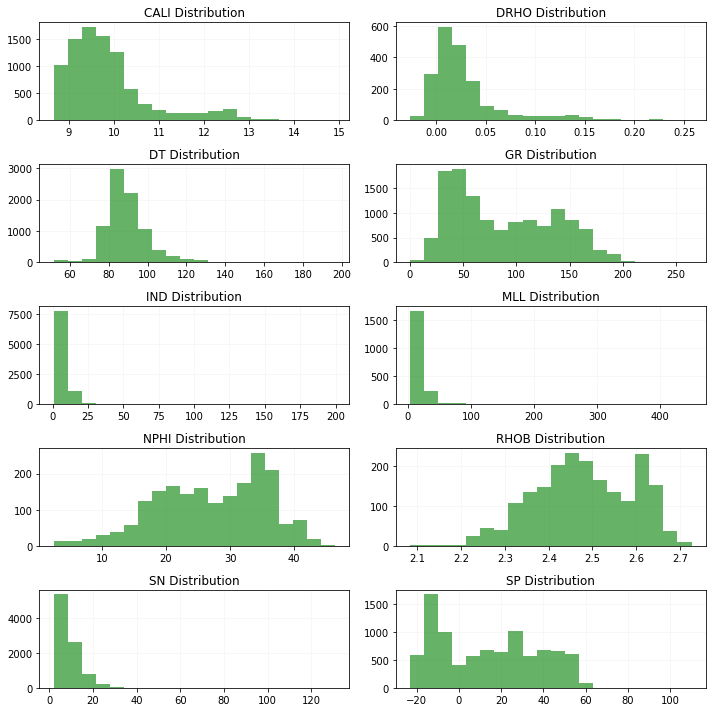

In [21]:
#Setup the number of rows and columns for our plot
rows = 5
cols = 2

fig=plt.figure(figsize=(10,10))

for i, feature in enumerate(cols_to_plot):
    ax=fig.add_subplot(rows,cols,i+1)
    well[feature].hist(bins=20,ax=ax,facecolor='green', alpha=0.6)
    ax.set_title(feature+" Distribution")
    ax.set_axisbelow(True)
    ax.grid(color='whitesmoke')

plt.tight_layout()  
plt.show()

### Displaying data on a crossplot (Scatterplot)

As seen in the first notebook, we can display a crossplot by simply doing the following. using the c argument we can add a third curve to colour the data.

<AxesSubplot:xlabel='NPHI', ylabel='RHOB'>

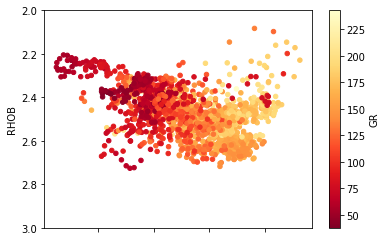

In [22]:
well.plot(kind="scatter", x="NPHI", y="RHOB", c="GR", 
          colormap="YlOrRd_r", ylim=(3,2))


We can take the above crossplot and create a 3D version. First we need to make sure the Jupyter notbook is setup for displaying interactive 3D plots using the following command.

In [32]:
%matplotlib inline

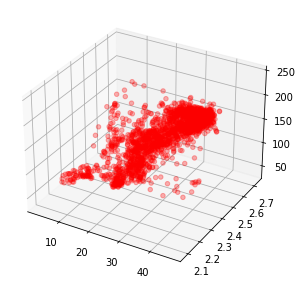

In [33]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(well["NPHI"], well["RHOB"], well["GR"], alpha= 0.3, c="r")

If we want to have multiple crossplots on view, we can do this by:

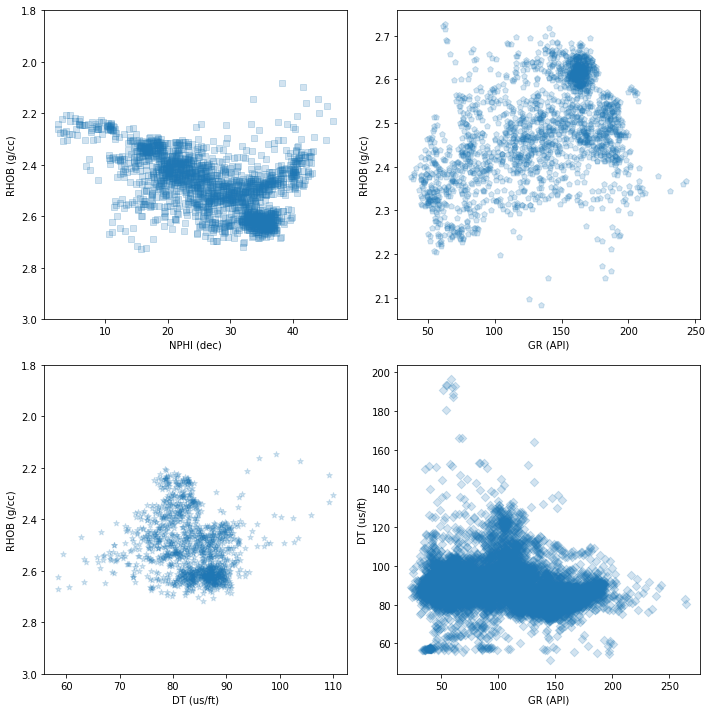

In [34]:
fig, ax = plt.subplots(figsize=(10,10))

ax1 = plt.subplot2grid((2,2), (0,0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((2,2), (0,1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((2,2), (1,0), rowspan=1, colspan=1)
ax4 = plt.subplot2grid((2,2), (1,1), rowspan=1, colspan=1)

ax1.scatter(x= "NPHI", y= "RHOB", data= well, marker="s", alpha= 0.2)
ax1.set_ylim(3, 1.8)
ax1.set_ylabel("RHOB (g/cc)")
ax1.set_xlabel("NPHI (dec)")


ax2.scatter(x= "GR", y= "RHOB", data= well, marker="p", alpha= 0.2)
ax1.set_ylim(3, 1.8)
ax2.set_ylabel("RHOB (g/cc)")
ax2.set_xlabel("GR (API)")

ax3.scatter(x= "DT", y= "RHOB", data= well, marker="*", alpha= 0.2)
ax3.set_ylim(3, 1.8)
ax3.set_ylabel("RHOB (g/cc)")
ax3.set_xlabel("DT (us/ft)")

ax4.scatter(x= "GR", y= "DT", data= well, marker="D", alpha= 0.2)
ax4.set_ylabel("DT (us/ft)")
ax4.set_xlabel("GR (API)")


plt.tight_layout()